### 图形化显示训练结果

In [21]:
"""图像化显示训练过程"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 模型大小
sz = "124M"

# gpt2/3的基线:在124M大小下
loss_baseline = {
    "124M":3.2924,
}[sz]
hella2_baseline = {
    "124M":0.294463,
    "350M":0.375224,
    "774M":0.431986,
    "1558M":0.488946,
}[sz]
hella3_baseline = {
    "124M":0.337,
    "350M":0.436,
    "774M":0.510,
    "1558M":0.547,
}[sz]

# 加载训练过程中的日志文件
with open("..\log\log.txt", "r") as f:
    lines = f.readlines()



In [29]:
# 提取train,val,hella等数据
streams = {}
for line in lines:
    step, stream, val = line.strip().split() # 将每行数据分开了
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val) # 返回的streams是{'val': {0: 10.9475}.., 'hella': {0: 0.2505}, 'train': {0: 10.952505}}
print(streams)

{'val': {0: 10.9475, 2: 9.8022, 4: 9.3624, 6: 8.8924, 8: 8.3453, 10: 7.9087, 12: 7.6722, 14: 7.5697, 15: 7.54}, 'hella': {0: 0.2505, 2: 0.2579, 4: 0.2571, 6: 0.2547, 8: 0.2566, 10: 0.2526, 12: 0.2485, 14: 0.2451, 15: 0.2463}, 'train': {0: 10.952505, 1: 10.317305, 2: 9.807405, 3: 9.54425, 4: 9.360376, 5: 9.155864, 6: 8.912912, 7: 8.658116, 8: 8.377022, 9: 8.193166, 10: 7.971803, 11: 7.845343, 12: 7.78475, 13: 7.727745, 14: 7.583054, 15: 7.595109}}


In [27]:
# 将step和loss等组成一个元组
streams_xy = {}
for k, v in streams.items():
    # 获取键值对，并排序
    xy = sorted(list(v.items()))
    streams_xy[k] = list(zip(*xy))
print(streams_xy)

{'val': [(0, 2, 4, 6, 8, 10, 12, 14, 15), (10.9475, 9.8022, 9.3624, 8.8924, 8.3453, 7.9087, 7.6722, 7.5697, 7.54)], 'hella': [(0, 2, 4, 6, 8, 10, 12, 14, 15), (0.2505, 0.2579, 0.2571, 0.2547, 0.2566, 0.2526, 0.2485, 0.2451, 0.2463)], 'train': [(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), (10.952505, 10.317305, 9.807405, 9.54425, 9.360376, 9.155864, 8.912912, 8.658116, 8.377022, 8.193166, 7.971803, 7.845343, 7.78475, 7.727745, 7.583054, 7.595109)]}


Min Train Loss: 7.583054
Min Val Loss: 7.54
Max acc in hella 0.2579


Text(0.5, 1.0, 'HellaSwag eval')

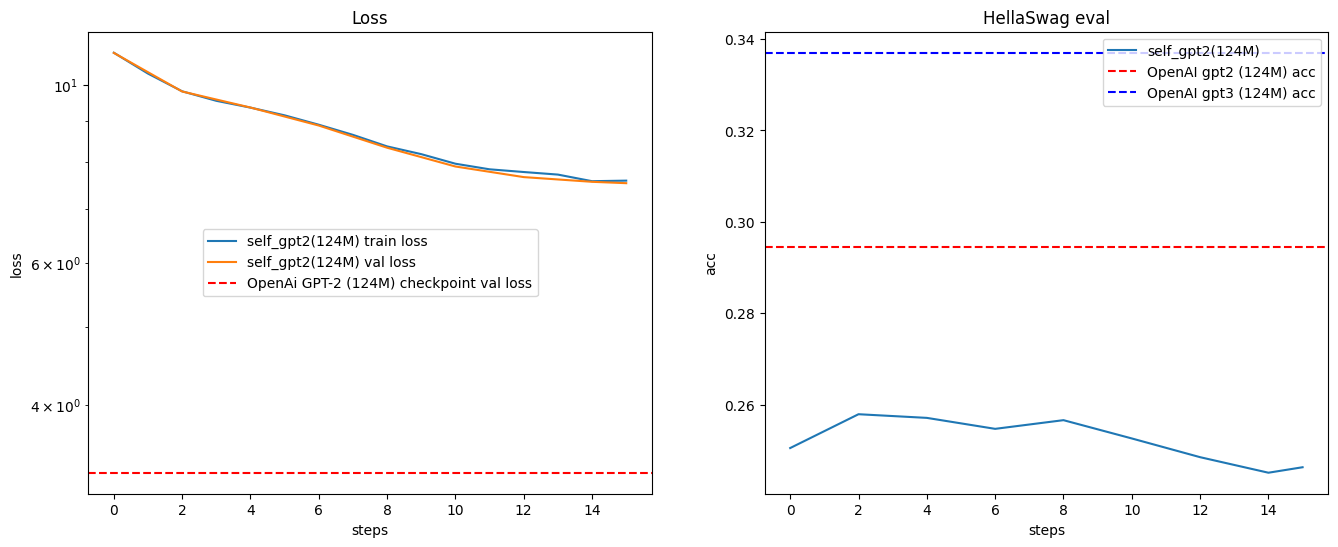

In [53]:
# 创建图表
plt.figure(figsize=(16, 6))
# 图表1：显示train and val ：loss
plt.subplot(121)
xs, ys = streams_xy["train"]                            # 获取train的loss
ys = np.array(ys)                                       # 转化为np格式
plt.plot(xs, ys, label=f"self_gpt2({sz}) train loss")   # 画在图上
print("Min Train Loss:", min(ys))                       # 打印最小loss
xs, ys = streams_xy["val"]                              # 获取val的loss
plt.plot(xs, ys, label=f"self_gpt2({sz}) val loss")    # 画在图上

# 将gpt2、3的基线显示在图上
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAi GPT-2 ({sz}) checkpoint val loss")

# 设置横纵轴和标签
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim()
plt.legend(loc='center') # 显示每条线的label
plt.title("Loss")
print("Min Val Loss:", min(ys))

# 图表2：显示在hellaswag数据集上的准确度
plt.subplot(122)
xs, ys = streams_xy["hella"]
ys = np.array(ys)
plt.plot(xs, ys, label=f'self_gpt2({sz})')
print(f"Max acc in hella {max(ys)}")
if hella2_baseline is not None:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI gpt2 ({sz}) acc")
if hella3_baseline is not None:
    plt.axhline(y=hella3_baseline, color='b', linestyle='--', label=f"OpenAI gpt3 ({sz}) acc")

plt.xlabel("steps")
plt.ylabel("acc")
plt.legend()
plt.title("HellaSwag eval")